# TP1 : Linear_reg
30/09/2019

In [1]:
import math 
import numpy as np # importe un package sous un nom particulier
from sklearn import linear_model # importe tout un module
import pandas as pd
from os import mkdir # importe une fonction
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statistics import mean
from mpl_toolkits.mplot3d.axes3d import get_test_data

#### 1) Récupérer les données du ﬁchier https://bitbucket.org/portierf/shared_files/downloads/ Galton.txt (voir aussi leur description ici http://www.randomservices.org/random/ data/Galton.html) et charger les avec Pandas. 

In [2]:
# Load data
url = 'https://bitbucket.org/portierf/shared_files/downloads/Galton.txt'
df = pd.read_csv(url, sep='\t')
print(df.shape)
df.head(5)

(898, 6)


,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


##### 2) Créer une colonne supplémentaire appelée “MeanParents” qui contient la taille du parent “moyen”, c’est-à-dire 1/2 (taille(pere) + 1.08taille(mere)). Pour plus d’explication sur cette transformation, on pourra consulter : https://17art.ru/fr/calculator-of-the-ratio-of-height-and-weight-of-the-child-calculate-theﬁnal-growth-of-the-child/


In [3]:
#df.assign(MeanParents=1/2*(df.Father+1.08*df.Mother))
df['MeanParents']=1/2*(df.Father+1.08*df.Mother)
df.head()

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


##### On note $x_i$ la taille du parent moyen pour la famille i et $y_i$ la taille de l’enfant. On écrit $ y_{i} = \theta_{1}xi + \theta_{0} + \epsilon_{i} $ et on modélise les variables εi comme centrées, indépendantes de même variance $σ^2$ inconnue.
#####  3)Tracer le nuage de points ($x_i$,$y_i$) pour 1 ≤ i ≤ n où n est le nombre d’observations ﬁgurant dans les données #####

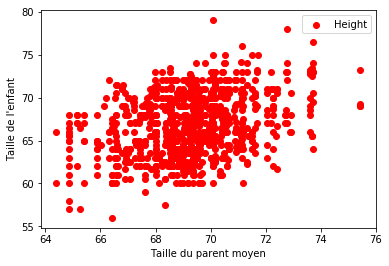

In [4]:
xi=df['MeanParents']
yi=df['Height']
plt.scatter(xi,yi, c='r')
plt.xlabel("Taille du parent moyen")
plt.ylabel("Taille de l'enfant")
plt.legend()

#### 4) Estimer $ \theta_{0} $ , $ \theta_{1} $, par $ \hat{\theta}_{0} , \hat{\theta}_{1} $ en utilisant la fonction LinearRegression de sklearn. Calculer et visualiser les valeurs prédites $ \hat{y}_{i} = \hat{\theta}_{1}x_i + \hat{\theta}_{0} $ et $y_{i} $ sur un même graphique.

Text(0.5, 1.0, 'Valeurs prédites Yi^ grâce aux Theta0,1 prédits (bleu) et nuage de points xi,yi (orange)')

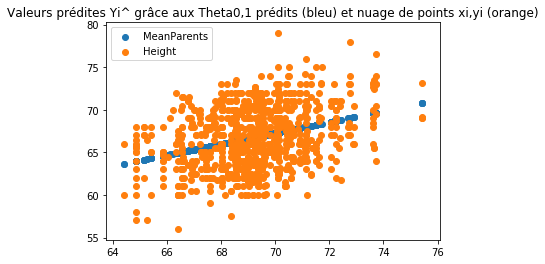

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X0 = df[['MeanParents']]
y = df['Height']
reg = LinearRegression().fit(X0, y)

#Estimation de theta 0 et theta 1
theta0 = reg.intercept_
theta1 = reg.coef_

Yi=theta1*xi+theta0
plt.scatter(X0,Yi) #prediction
plt.scatter(xi,yi) #nuage de points
plt.legend()
plt.title('Valeurs prédites Yi^ grâce aux Theta0,1 prédits (bleu) et nuage de points xi,yi (orange)')

#### 5) Vériﬁer la formule vue en cours liée au recentrage des données. On centrera les données et on vériﬁera que la prédiction eﬀectuée dans le modèle centré est bien la même que celle eﬀectuée précédemment. Justiﬁez votre réponse. On pourra déﬁnir yi,c et xi,c comme étant les variables centrées et calculer formule $$\hat{\theta}_{c}  \in \operatorname*{argmin}_{\theta\in R} \sum_{n=1}^{n}(y_{i,c}-x_{i,c}\theta)^{2}$$


Text(0.5, 1.0, 'Modele non-centré (Bleu), Modele centré (Orange)')

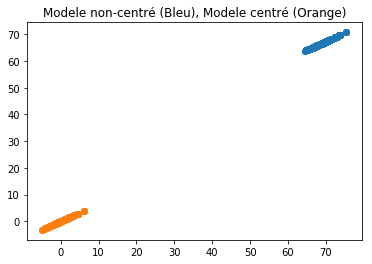

In [6]:
# on estime theta ~  ||yc-xc*theta ~||²
xc=xi-xi.mean() #variable centree
yc=yi-yi.mean()  #variable centree
regc = LinearRegression(fit_intercept=False).fit(xc.values.reshape(-1,1), yc) #Sans intercept

theta0c = regc.intercept_  # THETA0 centré est nul 
theta1c = regc.coef_       #THETA1 centré est une moyenne pondérée des “pentes” yic/xic 

Yic=theta1c*xc+theta0c
plt.scatter(xi,Yi)
plt.scatter(xc,Yic)
plt.title('Modele non-centré (Bleu), Modele centré (Orange)')

Les droites sont colinéaires. L'une ayant un point à l'origine et l'autre (recentré), ayant son origine le centre de gravité du nuage de points (xc,yc)=(0,0)

In [7]:
# Theta^ = moyenne(y)-moyenne(X).T theta~ 
#l1=yi.mean-np.transpose(xi.mean())*theta1c
#l1

#### 6) Visualiser l’histogramme des résidus $ r_{i} = y_{i} − \hat{y}_{i}$. ($\hat{y}_{i} $ est la valeur prédite par le modèle. L’hypothèse de normalité est-elle crédible?

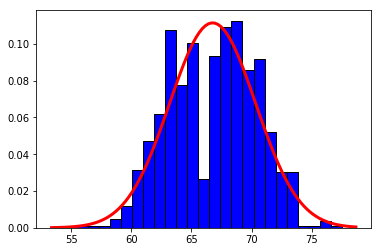

In [8]:
ri=yi.mean()-yc

# Plot the histogram.
plt.hist(ri, edgecolor='black', bins=25, density=True, color='b')

# Vérification de la normalité?
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(ri)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=3)

On observe la différence entre la valeur observée et la valeur prédite.
Les résidus sont centrés en ~68 et suivent une loi normale

#### 7) Sur un graphique similaire à celui de la question 3, sur lequel apparait le nuage de points et la droite de régression, distinguer  (à l’aide de deux couleurs diﬀérentes) lesﬁlles des garçons. Expliquer la forme de la distribution des résidus observée à la question précédente.

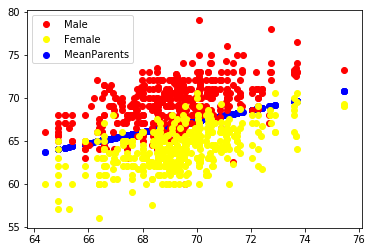

In [9]:
male = df['Gender'] == 'M'
female = df['Gender'] == 'F'
plt.plot(df['MeanParents'][male], y[male], 'o', label="Male", color='r')
plt.plot(df['MeanParents'][female], y[female], 'o', label="Female", color='yellow')

plt.scatter(X0,Yi, color='blue') # droite de regression
plt.legend()

#### Expliquer la forme de la distribution des résidus observée à la question précédente
Les résidus sont centrés autour d'une valeur moyenne (moyenne tailles du père et de la mère). Le centre de gravité du nuage de points est sur la droite de régression.

#### 8) Eﬀectuer une régression sur le groupe des garçons uniquement. Représenter cette droite de régression sur le graphique de la question précédente. Représenter la distribution des résidus obtenue sur ce modèle. Commenter.

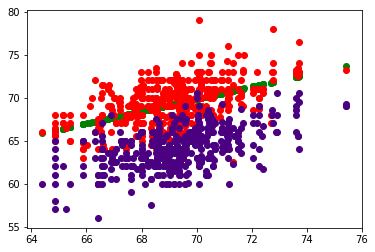

In [10]:
reg_male = LinearRegression().fit(xi[male].values.reshape(-1,1), yi[male])
theta0male = reg_male.intercept_
theta1male = reg_male.coef_

Yimale=theta1male*xi[male]+theta0male
plt.scatter(xi[male],Yimale, c='green') #regression sur les garçons
plt.plot(df['MeanParents'][male], y[male], 'o', color = 'red', label="Male")
plt.plot(df['MeanParents'][female], y[female], 'o', color = 'indigo', label="Female")

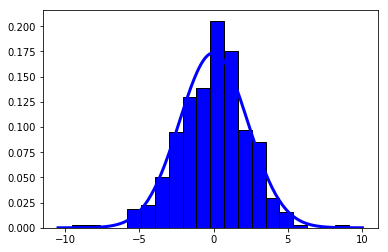

In [11]:
residu0=yi[male]-Yimale
plt.hist(residu0,edgecolor='black', bins=20, density=True, color='b')

# Vérification de la normalité?
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(residu0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 180)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'b', linewidth=3)

La distribution s'approche de la loi gaussienne.

#### 9) A l’aide d’un partitionnement aléatoire de l’échantillon, construire un échantillon de test et un échantillon d’apprentissage. L’échantillon test doit contenir 20% des données. On estimera, sur l’échantillon d’apprentissage deux modèles : un premier modèle basé uniquement sur les garçons, et un deuxième modèle basé sur l’échantillon complet. On comparera les deux prédicteurs sur le groupe “garçon” de l’échantillon test en calculant le risque de prédiction : $$ \frac{1}{|test|} \sum_{i∈test}(y_i − \hat{y}_i)^2$$, $\hat{y}_i$ est la valeur prédite par le modèle. 

In [12]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
#train

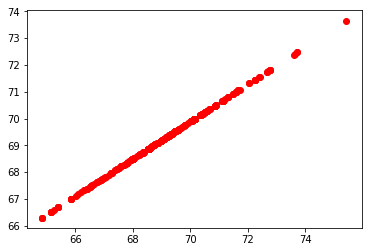

In [13]:
#echantillon d'apprentissage basé sur les garçons
male1 = train['Gender'] == 'M'
x_train=train['MeanParents']
y_train = train['Height']
reg_male_ech = LinearRegression().fit(x_train[male1].values.reshape(-1,1), y_train[male1])
theta0male_ech = reg_male_ech.intercept_
theta1male_ech= reg_male_ech.coef_

Yimale_ech=theta1male_ech*x_train[male1]+theta0male_ech
plt.scatter(x_train[male1],Yimale_ech, c='red') #regression sur male

0.650623662773636

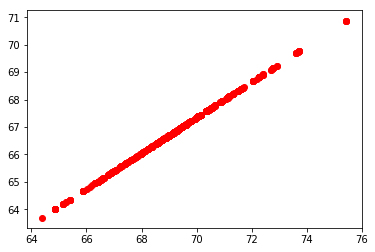

In [14]:
# Echantillon basé sur l'échantillon complet
x_train=train['MeanParents']
y_train = train['Height']
reg_ech_c = LinearRegression().fit(x_train.values.reshape(-1,1), y_train)
theta0_ech_c = reg_ech_c.intercept_
theta1_ech_c= reg_ech_c.coef_[0]

Yi_ech_c=theta1_ech_c*x_train+theta0_ech_c
plt.scatter(x_train,Yi_ech_c, c='red') #regression sur ech complet

theta1_ech_c

(array([ 1.,  0.,  8.,  9., 18., 22., 37., 39., 46., 49., 53., 50., 46.,
        39., 36., 37., 44., 54., 47., 24., 23., 17., 10.,  5.,  2.,  1.,
         0.,  0.,  0.,  1.]),
 array([-8.77089205, -8.09217843, -7.41346481, -6.73475119, -6.05603757,
        -5.37732395, -4.69861033, -4.01989671, -3.34118309, -2.66246947,
        -1.98375585, -1.30504224, -0.62632862,  0.052385  ,  0.73109862,
         1.40981224,  2.08852586,  2.76723948,  3.4459531 ,  4.12466672,
         4.80338034,  5.48209396,  6.16080758,  6.8395212 ,  7.51823482,
         8.19694844,  8.87566206,  9.55437568, 10.2330893 , 10.91180292,
        11.59051654]),
 <a list of 30 Patch objects>)

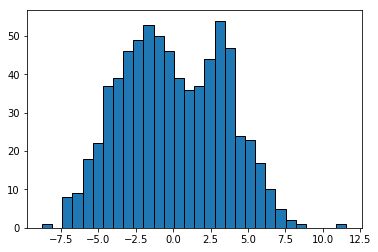

In [15]:
#prediction echantillon complet (meanParents)
predict1926=reg_ech_c.predict(x_train.values.reshape(-1,1))
residu1928=y_train-predict1926
plt.hist(residu1928, edgecolor='black', bins=30)

In [16]:
#prediction sur le jeu de test

y_test = test['Height']
male1 = test['Gender'] == 'M'
x_test_male=test['MeanParents']

y_predict=reg_male_ech.predict(x_test_male[male1].values.reshape(-1,1))
y_predict

array([68.50069242, 69.74552672, 67.83307179, 69.74552672, 69.16831305,
       68.27119783, 68.31292412, 69.42562517, 69.68989167, 68.34074165,
       68.2086084 , 67.45753519, 69.94720379, 69.54384966, 68.50069242,
       72.46468992, 70.698277  , 67.40190013, 69.51603213, 68.50069242,
       69.19613058, 72.38819172, 67.74961921, 70.23789694, 66.30310785,
       69.83454281, 71.55366593, 69.83454281, 69.54384966, 68.2086084 ,
       68.09733829, 69.42562517, 69.19613058, 69.57166718, 69.25176563,
       69.97502131, 68.87622903, 72.38819172, 68.4728749 , 70.35055792,
       69.19613058, 68.73018701, 69.18778532, 68.99445351, 67.37408261,
       66.998546  , 70.33664916, 68.87622903, 68.09733829, 69.58557595,
       68.4728749 , 69.58557595, 65.9832063 , 69.89156874, 68.75800454,
       69.97502131, 71.39371515, 67.9791138 , 66.30310785, 70.67045947,
       69.42562517, 68.8484115 , 69.97502131, 69.57166718, 70.99036102,
       68.74409578, 69.42562517, 68.34074165, 69.16831305, 70.21

In [17]:
reg_male_ech.score(x_test_male[male1].values.reshape(-1,1),y_test[male1])

0.3262709964937164

In [18]:
# |test|= cardinal nombre de garçons dans le modèle
test_abs=len(test['MeanParents'][male1])
test_abs

87

In [19]:
# risque de prédiction
risque = (1/test_abs)*sum((y_test[male1]-y_predict)**2)
risque

4.691121021356765

#### 10) En combinant les deux prédicteurs, celui appris sur les filles et celui appris sur les garçons, calculer le risque de prédiction associé. Pour chaque individu “garçon” on applique le modèle appris sur les garçons, pour chaque individu “fille” on lui applique le modèle appris sur les filles. On calculera ensuite le risque prédictif.

4.404651597182049

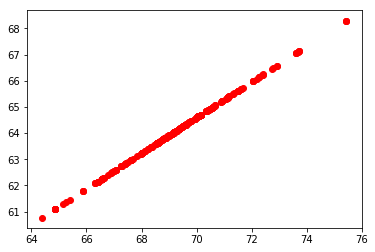

In [20]:
#echantillon d'apprentissage basé sur les filles
female1 = train['Gender'] == 'F'
x_train_fem=train['MeanParents']
y_train_fem = train['Height']
reg_female_ech = LinearRegression().fit(x_train_fem[female1].values.reshape(-1,1), y_train_fem[female1])
theta0female_ech = reg_female_ech.intercept_
theta1female_ech= reg_female_ech.coef_

Yifemale_ech=theta1female_ech*x_train_fem[female1]+theta0female_ech
plt.scatter(x_train_fem[female1],Yifemale_ech, c='red') #regression sur female

#prediction sur le jeu de test fem

y_test1 = test['Height']
female1 = test['Gender'] == 'F'
x_test_female=test['MeanParents']

y_predict=reg_female_ech.predict(x_test_female[female1].values.reshape(-1,1))
y_predict

# |test|= cardinal nombre de filles dans le modèle
test_abs1=len(test['MeanParents'][female1])
test_abs1

# risque de prédiction
risque_fem = (1/test_abs1)*sum((y_test[female1]-y_predict)**2)
risque_fem

In [21]:
#Risque de prédiction selon genre
def model_choice(gender):
    if gender=='female': 
        prediction=reg_female_ech.predict(x_test_female[female1])
    else:
        prediction=reg_male_ech.predict(x_test_male[male1])
    return prediction

In [30]:
#Risque predictif
def test_choice(gender):
    if gender=='female': 
        val_test=len(test['MeanParents'][female1])
    else:
        val_test=len(test['MeanParents'][male1])
    return val_test

def gender_choice(gender):
    if gender=='female': 
        y_g=y_test[female1]
    else:
        y_g=y_test[male1]
    return y_g

# risque de prédiction
def predictiveRisk(gender):
    risk = (1/test_choice(gender))*sum((gender_choice(gender))**2)
    return risk

######  11) En utilisant, un encodage booléen de la variable GENDER construire le même prédicteur que précédement. Calculer, "à la main", son coefficient de determination. On comparera ce dernier au coefficient de determination du modèle avec seulement la variable MeanParents. On pourra se référer au polycopié pour la définition du coefficient de determination (dit aussi le R2).

In [23]:
""""def test_choice():
    if df['Gender']=='F': 
        df['Gender']=1
    elif df['Gender']=='M':
        df['Gender']=0
    return df.head(5)"""

'"def test_choice():\n    if df[\'Gender\']==\'F\': \n        df[\'Gender\']=1\n    elif df[\'Gender\']==\'M\':\n        df[\'Gender\']=0\n    return df.head(5)'

In [24]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

def coef_det(Y_pred,Y,Y_mean):
    nom=(Y_pred-Y)
    nom=[nom[i]**2 for i in range(len(nom))]
    denom=(Y_pred-Y_mean)
    denom=[b[i]**2 for i in range(len(denom))]
    Rcarr=1-(sum(nom)/sum(denom))
    return Rcarr

def coef_det(Y_pred,Y,Y_moyenne):
    nomin=(Y_pred-Y)
    nomin=[nomin[i]**2 for i in range(len(nomin))]
    denomin=(Y_pred-Y_moyenne)
    denomin=[denomin[i]**2 for i in range(len(denomin))]
    Rcarre=1-(sum(nomin)/sum(denomin))
    return Rcarre

In [25]:
#Garçons: 1 et 0
train.Gender[train.Gender == 'M'] = 1
train.Gender[train.Gender == 'F'] = 0

test.Gender[test.Gender == 'M'] = 1
test.Gender[test.Gender == 'F'] = 0

%matplotlib inline

#Train pour les garçons
X_bool_train=train[['MeanParents', 'Gender']]
y_bool_train=train['Height']

#Test pour les garçons
X_bool_test=test[['MeanParents', 'Gender']]
y_bool_test=test['Height']

# prediction pour les garcons
reg = LinearRegression().fit(X_bool_train, y_bool_train)
a_bool=reg.coef_
b_bool=reg.intercept_  

y_pred_bool_test=reg.predict(X_bool_test)

# coeff de determination :
Y_pred=y_pred_bool_test
Y=y_bool_test.values
Y_mean=Y.mean()

Rcarr=coef_det(Y_pred,Y,Y_mean)
Rcarr

C:\Users\sonia.bouden\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sonia.bouden\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\sonia.bouden\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(

0.4205885293184012

In [32]:
#filles: 0 et 1
train.Gender[train.Gender == 'M'] = 0
train.Gender[train.Gender == 'F'] = 1

test.Gender[test.Gender == 'M'] = 0
test.Gender[test.Gender == 'F'] = 1

%matplotlib inline

#Train pour les filles
X_bool_train=train[['MeanParents', 'Gender']]
y_bool_train=train['Height']

#Test pour les filles
X_bool_test=test[['MeanParents', 'Gender']]
y_bool_test=test['Height']

# prediction pour les filles
reg = LinearRegression().fit(X_bool_train, y_bool_train)
a_bool=reg.coef_
b_bool=reg.intercept_  

y_pred_bool_test=reg.predict(X_bool_test)

# coeff de determination :
Y_pred=y_pred_bool_test
Y=y_bool_test.values
Y_mean=Y.mean()

#y_pred_bool_test=reg.predict(X_bool_test)

#m, b = best_fit_slope_and_intercept(X_bool_test.values.reshape(-1,1), y_bool_test.values.reshape(-1,1))
#regression_line = [(m*x)+b for x in X_bool_train]

#r_squared = coefficient_of_determination(y_bool_train,regression_line)
#print(r_squared)

Rcarr2=coef_det(Y_pred,Y,Y_mean)
Rcarr2

C:\Users\sonia.bouden\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sonia.bouden\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\sonia.bouden\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(

0.4205885293184012

In [27]:
RcarreT=Rcarr+Rcarr2
RcarreT

0.8411770586368024

#### 12) Faire une régression avec les 2 variables explicatives suivantes : la taille du père et de la mère. Faire un graphique (en 3 dimensions) qui représente le nuage de point et le plan de régression. Visualiser la distribution des résidus.

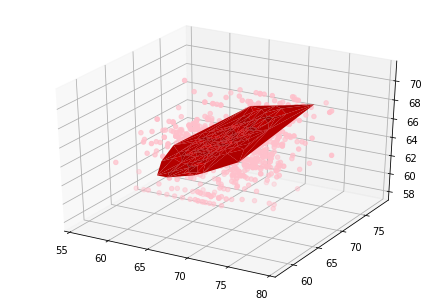

In [33]:
t_mere = df[['Mother']]
t_pere = df[['Father']]
t_parents=df[['Father', 'Mother']]
t_enfants=df[['Height']]
fig=plt.figure()

ax = Axes3D(fig)
ax.scatter(t_enfants,t_pere,t_mere, color='pink')

#plane regression
reg1 = LinearRegression().fit(t_parents, t_enfants)
z=reg1.predict(t_parents).reshape(-1)

surf = ax.plot_trisurf(df.Father, df.Mother, z, linewidth=0, color='red')

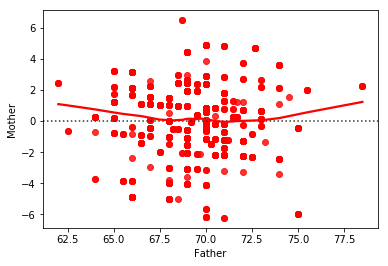

In [34]:
#residual distribution
sns.residplot(df.Father, df.Mother, z, lowess=True, color="r")

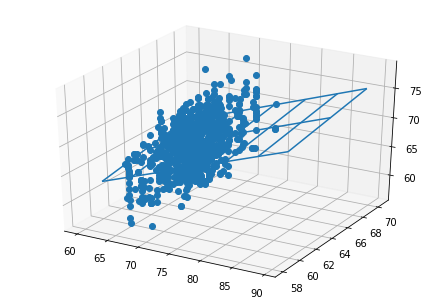

In [35]:
# Méthode du polycopie 
X = df[['Father', 'Mother']]
X = sm.add_constant(X)
y = df['Height']
model1 = sm.OLS(y, X).fit()
results = model1.params
XX = np.arange(60, 90, 0.5)
YY = np.arange(60, 70, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1]*xx + results[2]*yy
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X['Father'],X['Mother'],y,'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10)
plt.show()

(array([  5.,  50., 148., 194., 161., 173., 123.,  39.,   4.,   1.]),
 array([-9.13557001, -7.05315666, -4.97074331, -2.88832997, -0.80591662,
         1.27649673,  3.35891008,  5.44132343,  7.52373678,  9.60615013,
        11.68856348]),
 <a list of 10 Patch objects>)

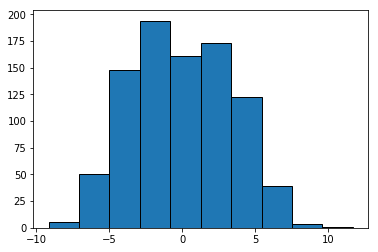

In [36]:
#residual distribution
residu=y-model1.predict(X)
plt.hist(residu, edgecolor='black')

#### 13) A l’aide d’un échantillon test (construit comme précédemment), comparer la performance du modèle précédent à celle du modèle contenant seulement la variable MeanParents. Commenter.


(array([ 2.,  4.,  9., 26., 29., 24., 22., 32., 18., 14.]),
 array([-9.22181265, -7.71457197, -6.20733129, -4.70009062, -3.19284994,
        -1.68560926, -0.17836858,  1.32887209,  2.83611277,  4.34335345,
         5.85059413]),
 <a list of 10 Patch objects>)

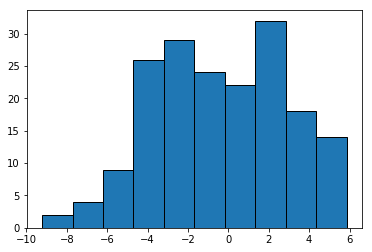

In [37]:
train1, test1 = train_test_split(df, test_size=0.2, random_state=42)
train1

#train
x_train1=train1[['Father', 'Mother']]
y_train1 = train1['Height']
reg_ech_c1 = LinearRegression().fit(x_train1, y_train1)
#theta0_ech_c1 = reg_ech_c1.intercept_
#theta1_ech_c1= reg_ech_c1.coef_

#Yi_ech_c1=theta1_ech_c1*x_train1+theta0_ech_c1

#test
x_test1=test1[['Father', 'Mother']]
y_test1=test1['Height']
y_predict1=reg_ech_c1.predict(x_test1)

#residu1938
residu1938= y_test1-y_predict1
plt.hist(residu1938, edgecolor='black')

In [38]:
mean_squared_error(y_test1,y_predict1)

10.962247170858603